1.	Import the libraries
2.	Import the dataset
3.	Taking only two classes, and converting the categorical data to numerical
4.	Assign weights to each instance
5.	Split the data into X_train and Y_train
6.	Fit the Decision Tree model
7.	Plot the tree for the iteration
8.	Predict
9.	Calculate the error 
10.	Calculate the performance of the stump
11.	Update the weight
12.	Normalize the weight
13.	Repeat from step 5 for 4 iterations
14.	Calculate the overall accuracy of the Adaboost model


In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import sample
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from math import log,exp
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#importing file
iris = pd.read_csv("iris.csv")  

In [4]:
iris = iris.drop('Unnamed: 0', axis=1)

In [5]:
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [6]:
#considering only two classes
example = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [7]:
example.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


In [8]:
#replacing the two classes with +1 and -1
example['Label'] = example['Species'].replace(to_replace = ['versicolor','virginica'], value=[1,-1])

In [9]:
example = example.drop('Species', axis = 1)

In [10]:
#Initially assign same weights to each records in the dataset
example['probR1'] = 1/(example.shape[0])

In [11]:
example.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
50,7.0,3.2,4.7,1.4,1,0.01
51,6.4,3.2,4.5,1.5,1,0.01
52,6.9,3.1,4.9,1.5,1,0.01
53,5.5,2.3,4.0,1.3,1,0.01
54,6.5,2.8,4.6,1.5,1,0.01


In [12]:
#simple random sample with replacement
random.seed(10)
example1 = example.sample(len(example), replace = True, weights = example['probR1'])

In [13]:
example1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1
101,5.8,2.7,5.1,1.9,-1,0.01
60,5.0,2.0,3.5,1.0,1,0.01
85,6.0,3.4,4.5,1.6,1,0.01
111,6.4,2.7,5.3,1.9,-1,0.01
85,6.0,3.4,4.5,1.6,1,0.01
100,6.3,3.3,6.0,2.5,-1,0.01
50,7.0,3.2,4.7,1.4,1,0.01
95,5.7,3.0,4.2,1.2,1,0.01
133,6.3,2.8,5.1,1.5,-1,0.01
86,6.7,3.1,4.7,1.5,1,0.01


In [14]:
#X_train and Y_train split
X_train = example1.iloc[0:len(iris),0:4]
y_train = example1.iloc[0:len(iris),4]

In [15]:
#fitting the DT model with depth one
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

[Text(167.4, 163.07999999999998, 'X[2] <= 4.85\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(83.7, 54.360000000000014, 'gini = 0.078\nsamples = 49\nvalue = [2, 47]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.075\nsamples = 51\nvalue = [49, 2]')]

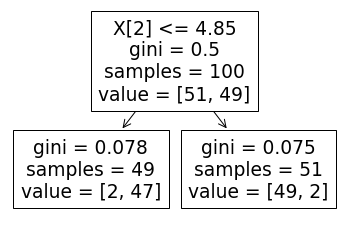

In [16]:
#plotting tree for round 1 boosting
tree.plot_tree(clf)

In [17]:
#prediction
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
y_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [18]:
#adding a column pred1 after the first round of boosting
example['pred1'] = y_pred

In [19]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1
50,7.0,3.2,4.7,1.4,1,0.01,1
51,6.4,3.2,4.5,1.5,1,0.01,1
52,6.9,3.1,4.9,1.5,1,0.01,-1
53,5.5,2.3,4.0,1.3,1,0.01,1
54,6.5,2.8,4.6,1.5,1,0.01,1
55,5.7,2.8,4.5,1.3,1,0.01,1
56,6.3,3.3,4.7,1.6,1,0.01,1
57,4.9,2.4,3.3,1.0,1,0.01,1
58,6.6,2.9,4.6,1.3,1,0.01,1
59,5.2,2.7,3.9,1.4,1,0.01,1


In [20]:
#misclassified = 0 if the label and prediction are same
example.loc[example.Label != example.pred1, 'misclassified'] = 1
example.loc[example.Label == example.pred1, 'misclassified'] = 0

In [21]:
#error calculation
e1 = sum(example['misclassified'] * example['probR1'])

In [22]:
e1

0.07

In [23]:
#calculation of alpha (performance)
alpha1 = 0.5*log((1-e1)/e1)

In [24]:
#update weight
new_weight = example['probR1']*np.exp(-1*alpha1*example['Label']*example['pred1'])

In [25]:
#normalized weight
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [26]:
example['prob2'] = round(normalized_weight,4)

In [27]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054


### Round 2

In [28]:
random.seed(20)
example2 = example.sample(len(example), replace = True, weights = example['prob2'])
example2 = example2.iloc[:,0:5]
X_train = example2.iloc[0:len(iris),0:4]
y_train = example2.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
#adding a column pred2 after the second round of boosting
example['pred2'] = y_pred

[Text(167.4, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(83.7, 54.360000000000014, 'gini = 0.117\nsamples = 48\nvalue = [3, 45]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.204\nsamples = 52\nvalue = [46, 6]')]

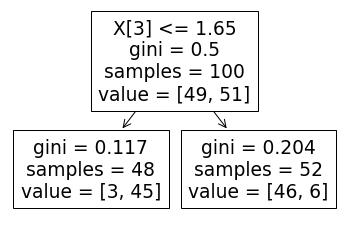

In [29]:
#plotting tree for round 2 boosting
tree.plot_tree(clf)

In [30]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1


In [31]:
#adding a field misclassified2
example.loc[example.Label != example.pred2, 'misclassified2'] = 1
example.loc[example.Label == example.pred2, 'misclassified2'] = 0

In [32]:
# calculation of error
e2 = sum(example['misclassified2'] * example['prob2'])
e2

0.09840000000000002

In [33]:
#calculation of alpha
alpha2 = 0.5*log((1-e2)/e2)
alpha2

1.1075650793336793

In [34]:
#update weight
new_weight = example['prob2']*np.exp(-1*alpha2*example['Label']*example['pred2'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [35]:
example['prob3'] = round(normalized_weight,4)

In [36]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0396
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030


### Round 3

In [37]:
random.seed(30)
example3 = example.sample(len(example), replace = True, weights = example['prob3'])
example3 = example3.iloc[:,0:5]
X_train = example3.iloc[0:len(iris),0:4]
y_train = example3.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred3 after the third round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred3'] = y_pred

[Text(167.4, 163.07999999999998, 'X[2] <= 5.35\ngini = 0.435\nsamples = 100\nvalue = [32, 68]'),
 Text(83.7, 54.360000000000014, 'gini = 0.331\nsamples = 86\nvalue = [18, 68]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]')]

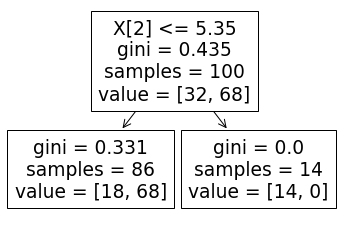

In [38]:
#plotting tree for round 3 boosting
tree.plot_tree(clf)

In [39]:
#adding a field misclassified3
example.loc[example.Label != example.pred3, 'misclassified3'] = 1
example.loc[example.Label == example.pred3, 'misclassified3'] = 0

In [40]:
#weighted error calculation
e3 = sum(example['misclassified3'] * example['prob3']) #/len(example)
e3

0.21860000000000004

In [41]:
#calculation of performance(alpha)
alpha3 = 0.5*log((1-e3)/e3)

In [42]:
#update weight
new_weight = example['prob3']*np.exp(-1*alpha3*example['Label']*example['pred3'])
z = sum(new_weight)
normalized_weight = new_weight/sum(new_weight)

In [43]:
example['prob4'] = round(normalized_weight,4)

In [44]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0396,1,0.0,0.0253
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019


### Round 4

In [45]:
random.seed(40)
example4 = example.sample(len(example), replace = True, weights = example['prob4'])
example4 = example4.iloc[:,0:5]
X_train = example4.iloc[0:len(iris),0:4]
y_train = example4.iloc[0:len(iris),4]

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

#adding a column pred4 after the fourth round of boosting
y_pred = clf_gini.predict(example.iloc[0:len(iris),0:4])
example['pred4'] = y_pred

[Text(167.4, 163.07999999999998, 'X[0] <= 6.6\ngini = 0.42\nsamples = 100\nvalue = [70, 30]'),
 Text(83.7, 54.360000000000014, 'gini = 0.236\nsamples = 73\nvalue = [63, 10]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.384\nsamples = 27\nvalue = [7, 20]')]

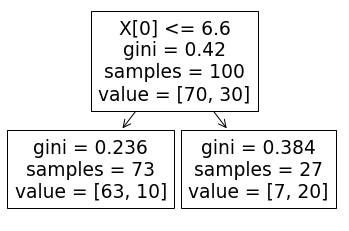

In [46]:
#plotting tree for round 4 boosting
tree.plot_tree(clf)

In [47]:
#adding a field misclassified4
example.loc[example.Label != example.pred4, 'misclassified4'] = 1
example.loc[example.Label == example.pred4, 'misclassified4'] = 0

In [48]:
#error calculation
e4 = sum(example['misclassified4'] * example['prob4']) 
e4

0.21340000000000037

In [49]:
# calculation of performance (alpha)
alpha4 = 0.5*log((1-e4)/e4)

In [50]:
#printing the alpha value which is used in each round of boosting
print(alpha1)
print(alpha2)
print(alpha3)
print(alpha4)

1.2933446720489712
1.1075650793336793
0.6369218034392659
0.652275760565027


In [51]:
#final prediction
t = alpha1 * example['pred1'] + alpha2 * example['pred2'] + alpha3 * example['pred3'] + alpha4 * example['pred4']

In [52]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [53]:
example['final_pred'] = np.sign(list(t))

In [54]:
example

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Label,probR1,pred1,misclassified,prob2,pred2,misclassified2,prob3,pred3,misclassified3,prob4,pred4,misclassified4,final_pred
50,7.0,3.2,4.7,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,1,0.0,1.0
51,6.4,3.2,4.5,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
52,6.9,3.1,4.9,1.5,1,0.01,-1,1.0,0.0714,1,0.0,0.0396,1,0.0,0.0253,1,0.0,1.0
53,5.5,2.3,4.0,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
54,6.5,2.8,4.6,1.5,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
55,5.7,2.8,4.5,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
56,6.3,3.3,4.7,1.6,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
57,4.9,2.4,3.3,1.0,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
58,6.6,2.9,4.6,1.3,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0
59,5.2,2.7,3.9,1.4,1,0.01,1,0.0,0.0054,1,0.0,0.0030,1,0.0,0.0019,-1,1.0,1.0


In [55]:
#Confusion matrix
c=confusion_matrix(example['Label'], example['final_pred'])
c

array([[47,  3],
       [ 3, 47]])

In [56]:
#Overall Accuracy
(c[0,0]+c[1,1])/np.sum(c)*100

94.0

### Fitting the model using the adaboost classifier library

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
iris = pd.read_csv("iris.csv")  
iris = iris.drop('Unnamed: 0', axis=1)
iris = iris[(iris['Species'] == 'versicolor') | (iris['Species'] == 'virginica')]

In [59]:
#X_train and Y_train split
X_train = iris.iloc[0:len(iris),0:4]
y_train = iris.iloc[0:len(iris),4]

In [60]:
clf = AdaBoostClassifier(n_estimators=4, random_state=0)
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [61]:
clf.predict([[5.5, 2.5, 4.0, 1.3]])

array(['versicolor'], dtype=object)

In [62]:
clf.score(X_train, y_train)

0.96